# __DATA 330 - Applied Time Series Analysis - Tech House Music Analysis__  

### Conrad Ning, Matt McCormack, Keagan Delong 
### Last edited: 2021-05-11

## __Introduction__ 



The purpose of this lab is to analyze the differences between the two songs in R. The two songs that will be used are “On My Mind” by Diplo & Sidepiece, and an original song “Where Did You Go” by an up-and-coming DJ, DJ Kaos. We thought it would be interesting to take a song that was not produced by an established music label and compare it to something in the same genre that has undergone professional sound editing. Our main goal is to identify frequencies or patterns in the two tracks that make them similar to determine if the homemade/independent song is within the known music genre. We loaded the mp3 files into R using the “tuneR” package (Ligges, 2018). We also plan on using packages provided by the textbook for the analysis, such as the plotts.wge package, to visualize things like the periodograms. For the study, we will be focusing on tempo and length of time in the intro/outro takes and the time spent in the “middle” of the song.

## Summary Statistics

| Audio File | Audio Length (Mins) | Number of Samples | Sampling Frequency | Hertz Range |
| :-------: | :------: | :------: | :------: | :------: |
| Where did you go? | 3.2 | 8537472 | 44100 | 20-20,000 (est) | 
| On My Mind | 5.2 | 13769856 | 44100 | 20-20,000 (est) |

## __Methods__

### __Load the Data__

In [ ]:
install.packages("tuneR", dependencies = TRUE)
install.packages("tswge")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘pastecs’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘PolynomF’, ‘waveslim’, ‘astsa’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("tuneR")
library("tswge")
library("ggplot2")

In [ ]:
# Download audio file to our cloud server
mp3_url <- "https://github.com/msmccormack/DATA330/blob/main/Where_did_you_go.mp3?raw=true"
mp3_file <- "/tmp/Where_did_you_go.mp3"
download.file(
  url = mp3_url, 
  destfile = mp3_file, 
  method = "auto")

In [ ]:
#read in the second song
mp3_url2 <- "https://github.com/kndelong/stuff/blob/main/OnMyMind_Audio_mp3.mp3?raw=true"
mp3_file2 <- "/tmp/OnMyMind_Audio_mp3.mp3"
download.file(
  url = mp3_url2, 
  destfile = mp3_file2, 
  method = "auto")

### __Check Audio File Properties__

### __Handle the Audio File__

After we load in the two mp3 audio files, We handle the audio file with the help from code snippets provided by Professor Davis (Davis, T. (2021). Code Snippets - Analyzing Audio Files). We read the two files with the ```readMP3``` function from tuneR package. To handle the two-channels of audio of each song, we will isolate the left audio channel, which is also used in the code snippet.

In [ ]:
# Read in the MP3 files
wdyg <- readMP3(mp3_file)
str(wdyg)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:8537472] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:8537472] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [ ]:
omm <- readMP3(mp3_file2)
str(omm)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:13769856] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:13769856] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [ ]:
# Check audio length (convert seconds to minutes)
num_samples <- length(wdyg@left)
num_samples / wdyg@samp.rate / 60

[1] 3.226558

In [ ]:
num_samples2 <- length(omm@left)
num_samples2 / omm@samp.rate / 60

[1] 5.204027

In [ ]:
# Pull only the left audio channel
s1 <- wdyg@left
s2 <- omm@left

### __Convert the Sound Arrays to Floating Point Values__

Our audio files have 16-bit depth (wdyg@bit & omm@bit). 
This means that the sound pressure values are mapped to integer values that can range from -2^15 to (2^15)-1. 
We can convert our sound array to floating point values ranging from -1 to 1 as follows:

In [ ]:
m1 <- s1 / 2^(wdyg@bit - 1)

In [ ]:
m2 <- s2 / 2^(omm@bit - 1)

### __Plot the Tone for Both Songs__

A time representation of the sound can be obtained by plotting the pressure values against the time axis; however, we need to create an array containing the time points first:

In [ ]:
my_time <- (0:(num_samples - 1)) / wdyg@samp.rate

In [ ]:
my_time2 <- (0:(num_samples2 - 1)) / omm@samp.rate

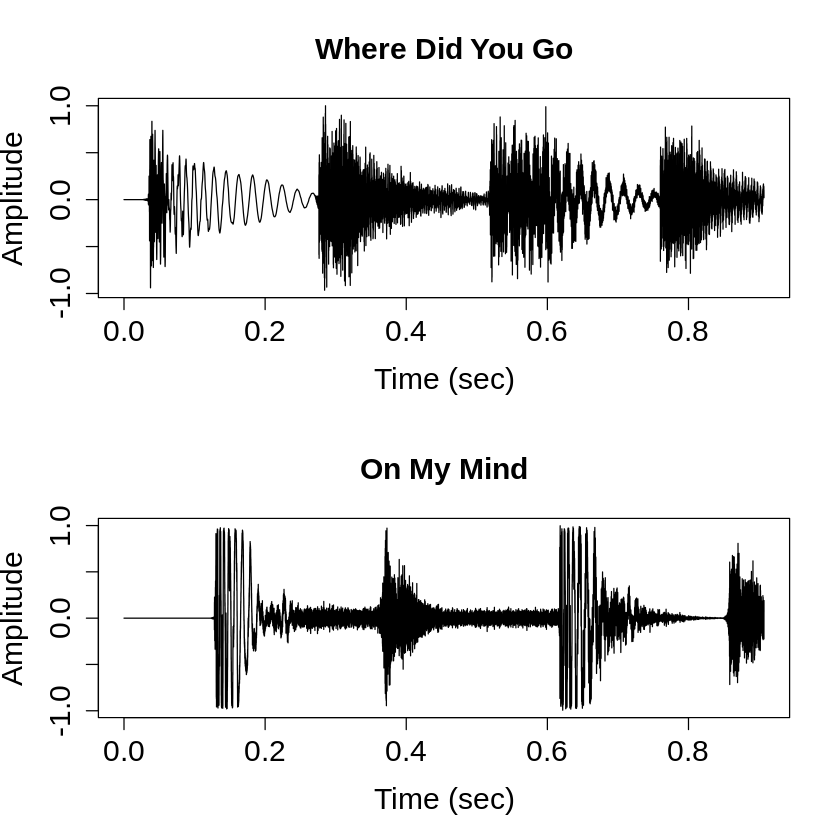

In [ ]:
par(mfrow = c(2,1), cex.main =  1.5, cex.lab = 1.5, cex.axis = 1.5)
plot(my_time[0:40000], m1[0:40000], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'Where Did You Go')
plot(my_time2[0:40000], m2[0:40000], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'On My Mind')


### __Downsample Each Song, by 1/16 the Sampling Rate__

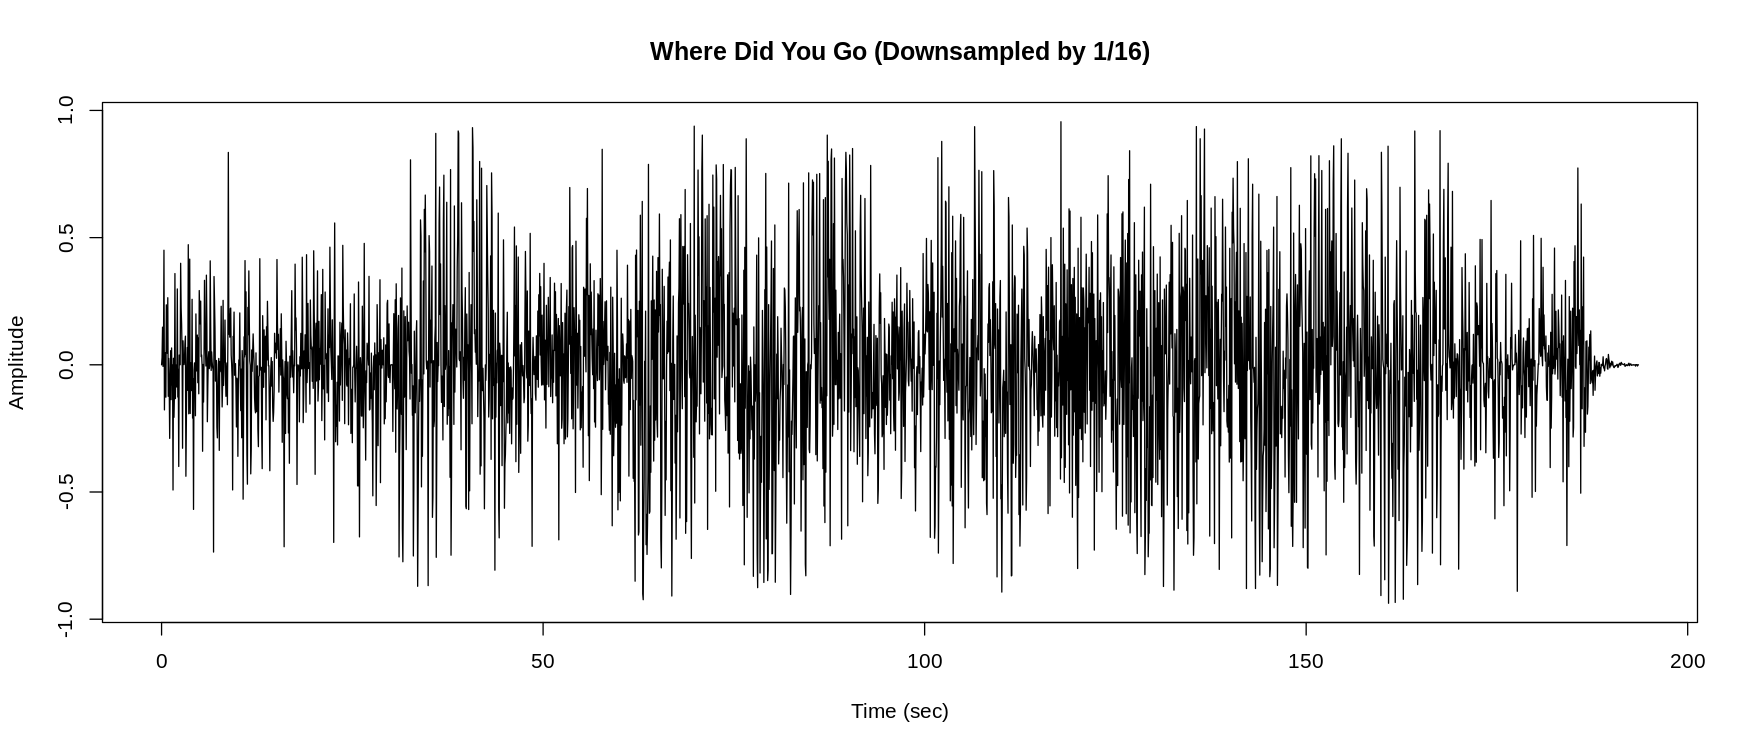

In [ ]:
# Downsampling by 1/16 the sampling rate
my.indx <- seq(1, (num_samples - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time[my.indx], m1[my.indx], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'Where Did You Go (Downsampled by 1/16)')

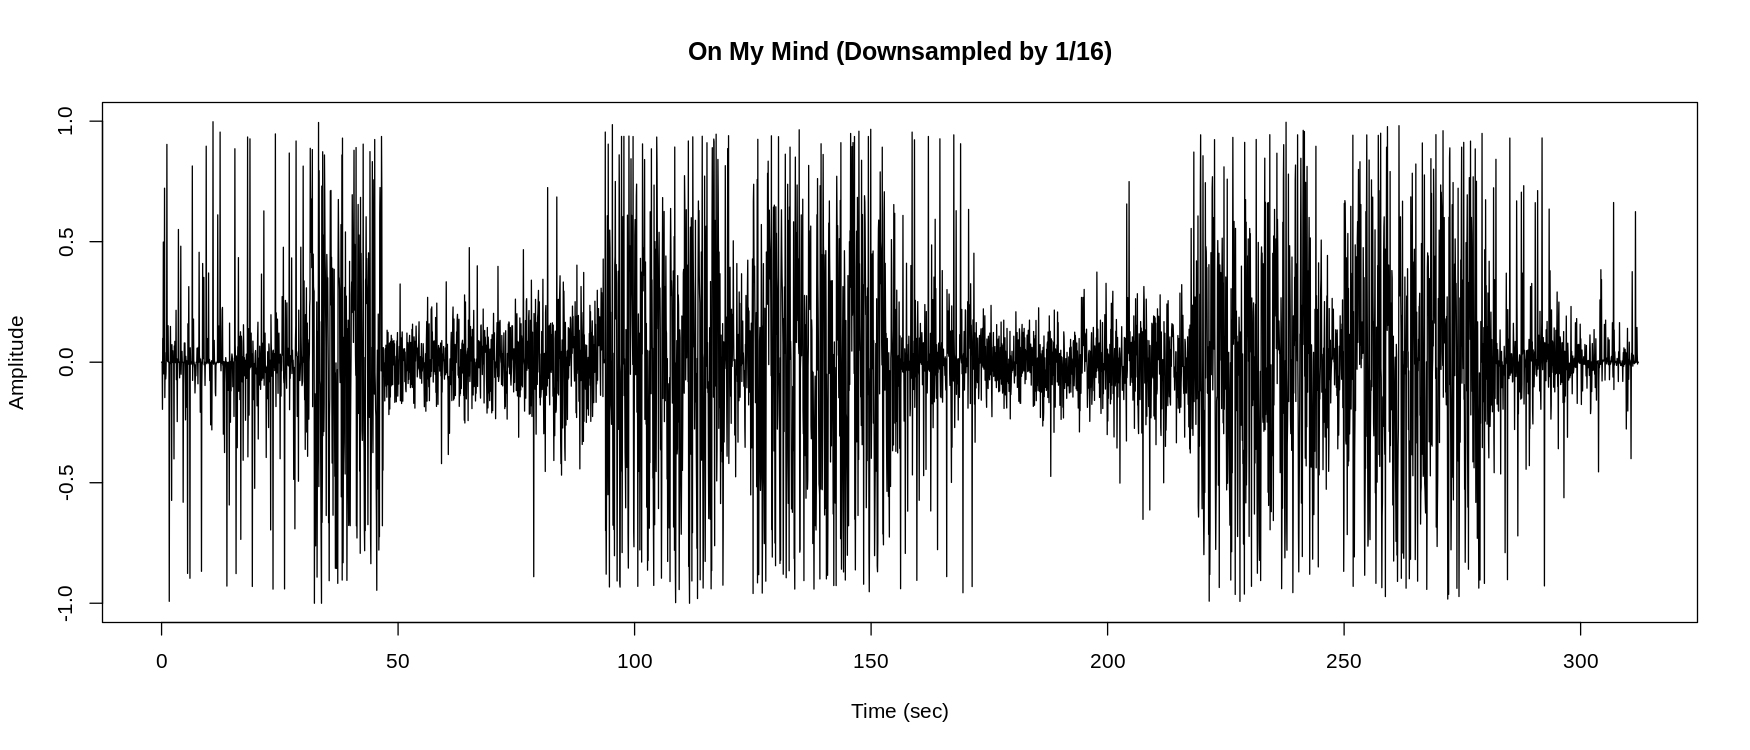

In [ ]:
#Downsample the second song
my.indx2 <- seq(1, (num_samples2 - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time2[my.indx2], m2[my.indx2], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'On My Mind (Downsampled by 1/16)')

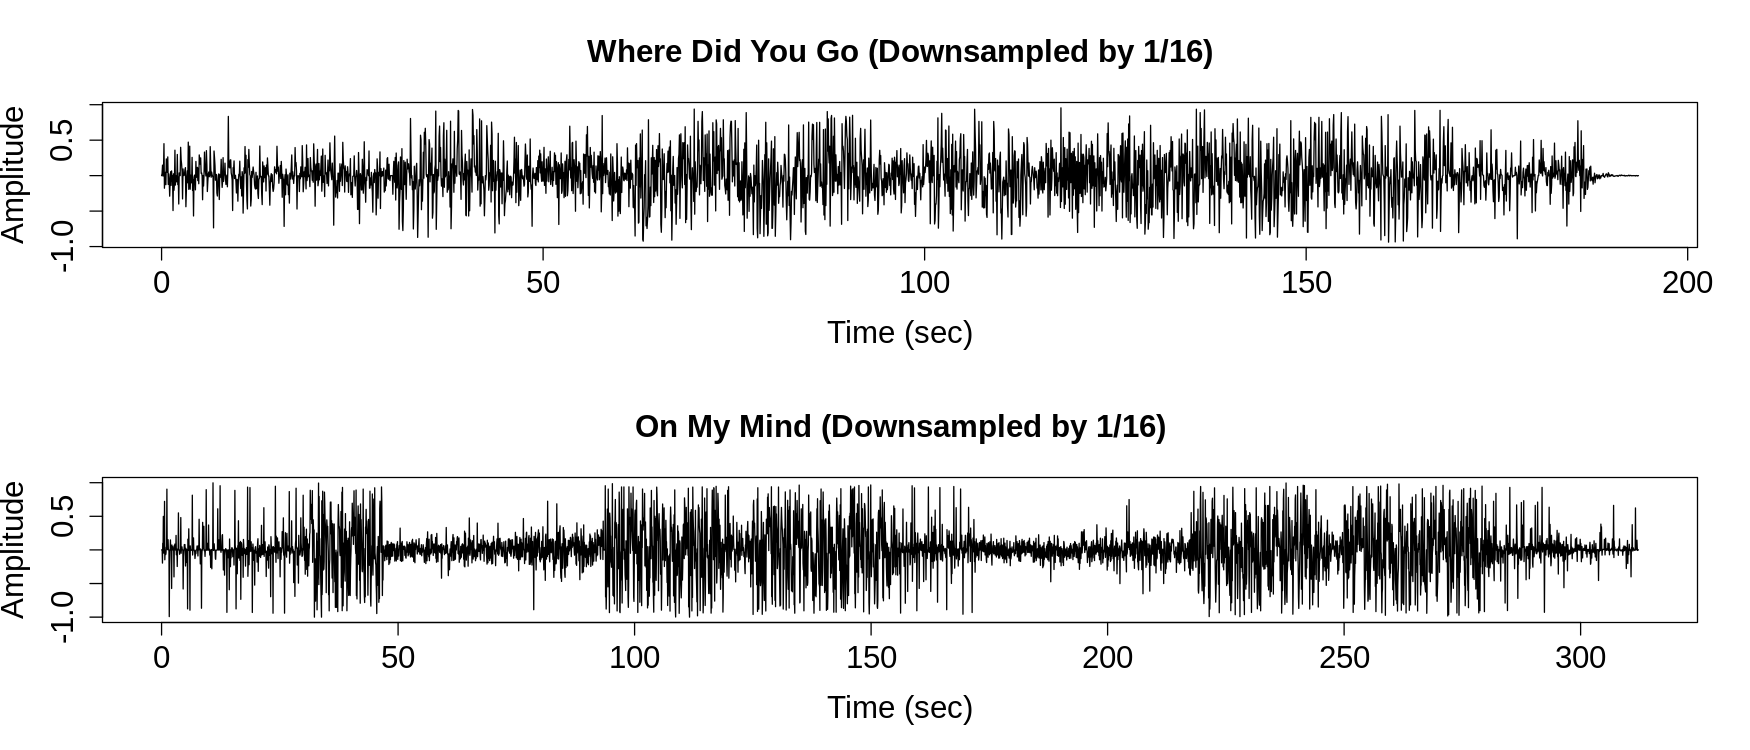

In [ ]:
#Side-by-side plot of the two songs (downsampled)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
par(mfrow = c(2,1), cex.main =  1.5, cex.lab = 1.5, cex.axis = 1.5)
plot(my_time[my.indx], m1[my.indx], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'Where Did You Go (Downsampled by 1/16)')
plot(my_time2[my.indx2], m2[my.indx2], type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'On My Mind (Downsampled by 1/16)')

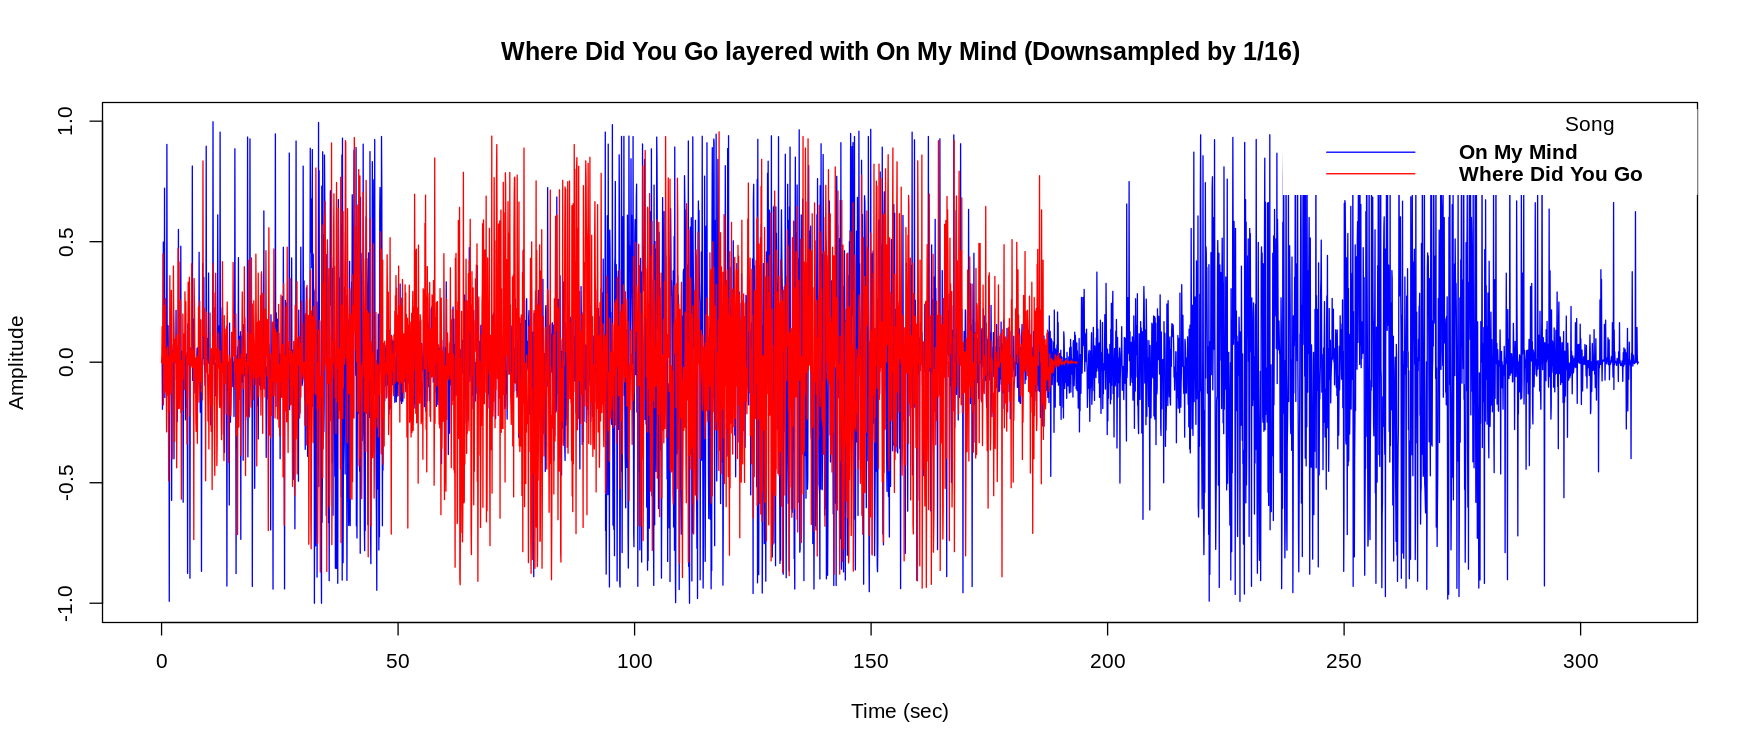

In [ ]:
#Overlay of the songs ontop of one another to visualize differences in amplitude
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time2[my.indx2], m2[my.indx2], type='l', col='blue', xlab='Time (sec)', ylab='Amplitude', main = 'Where Did You Go layered with On My Mind (Downsampled by 1/16)')
lines(my_time[my.indx], m1[my.indx], col='red')
legend(237,1.05, 
legend=c("On My Mind","Where Did You Go"),
col=c("blue","red"),
title="Song",
text.font=2,
lty=1:1, box.lty=0,
cex = 1)


### __Plotting the Frequency Content__

Another useful graphical representation is that of the frequency content, or spectrum of the tone. 

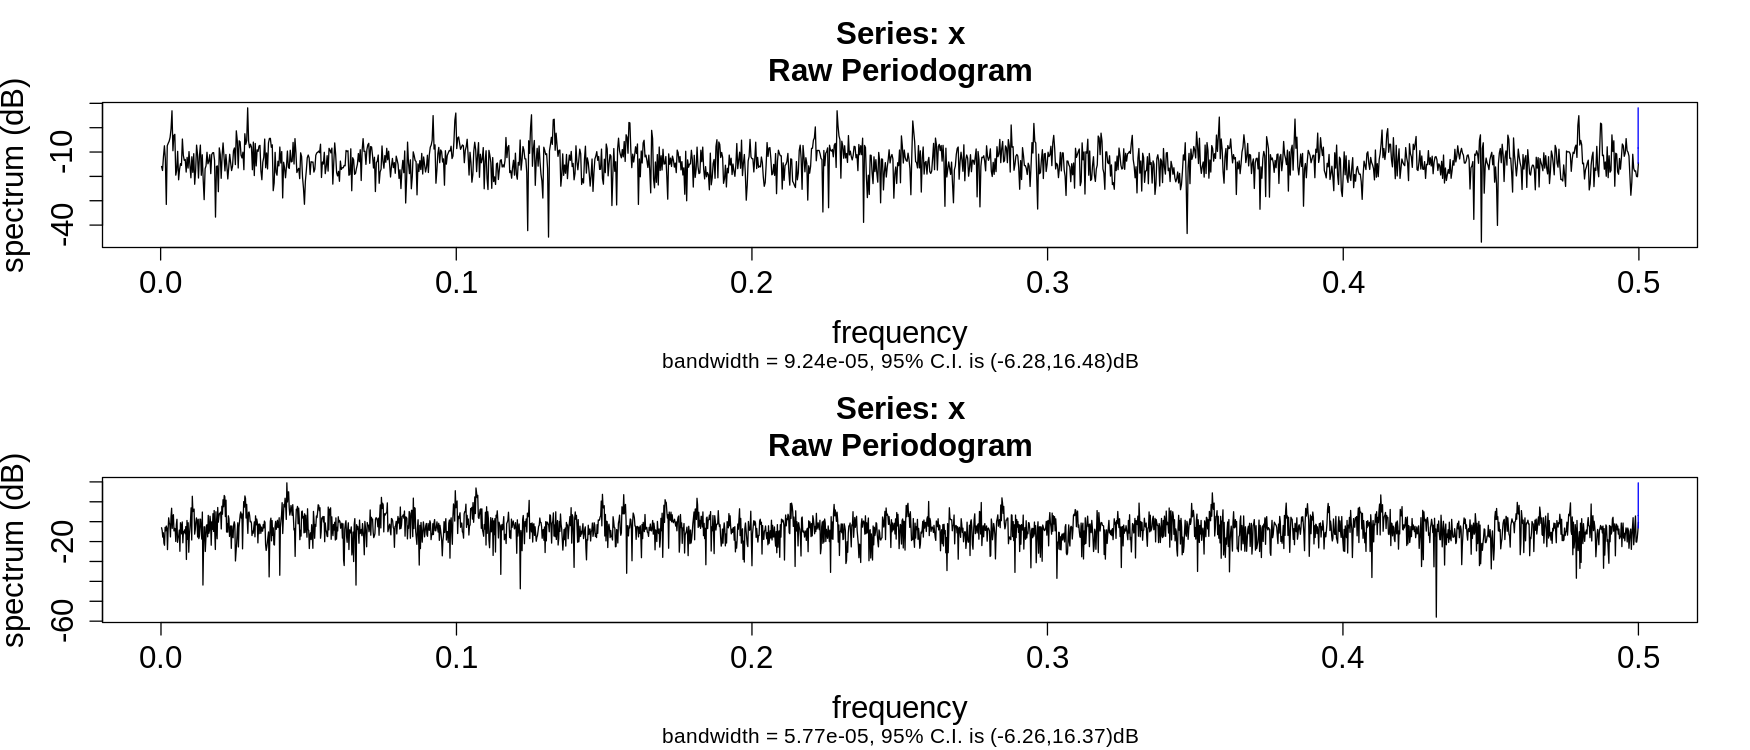

In [ ]:
# Try the built-in R function
par(mfrow = c(2,1), cex.main =  1.5, cex.lab = 1.5, cex.axis = 1.5)
spectrum(m1[my.indx], log="dB")
spectrum(m2[my.indx2], log="dB")

### __Time Series Sample Plots__

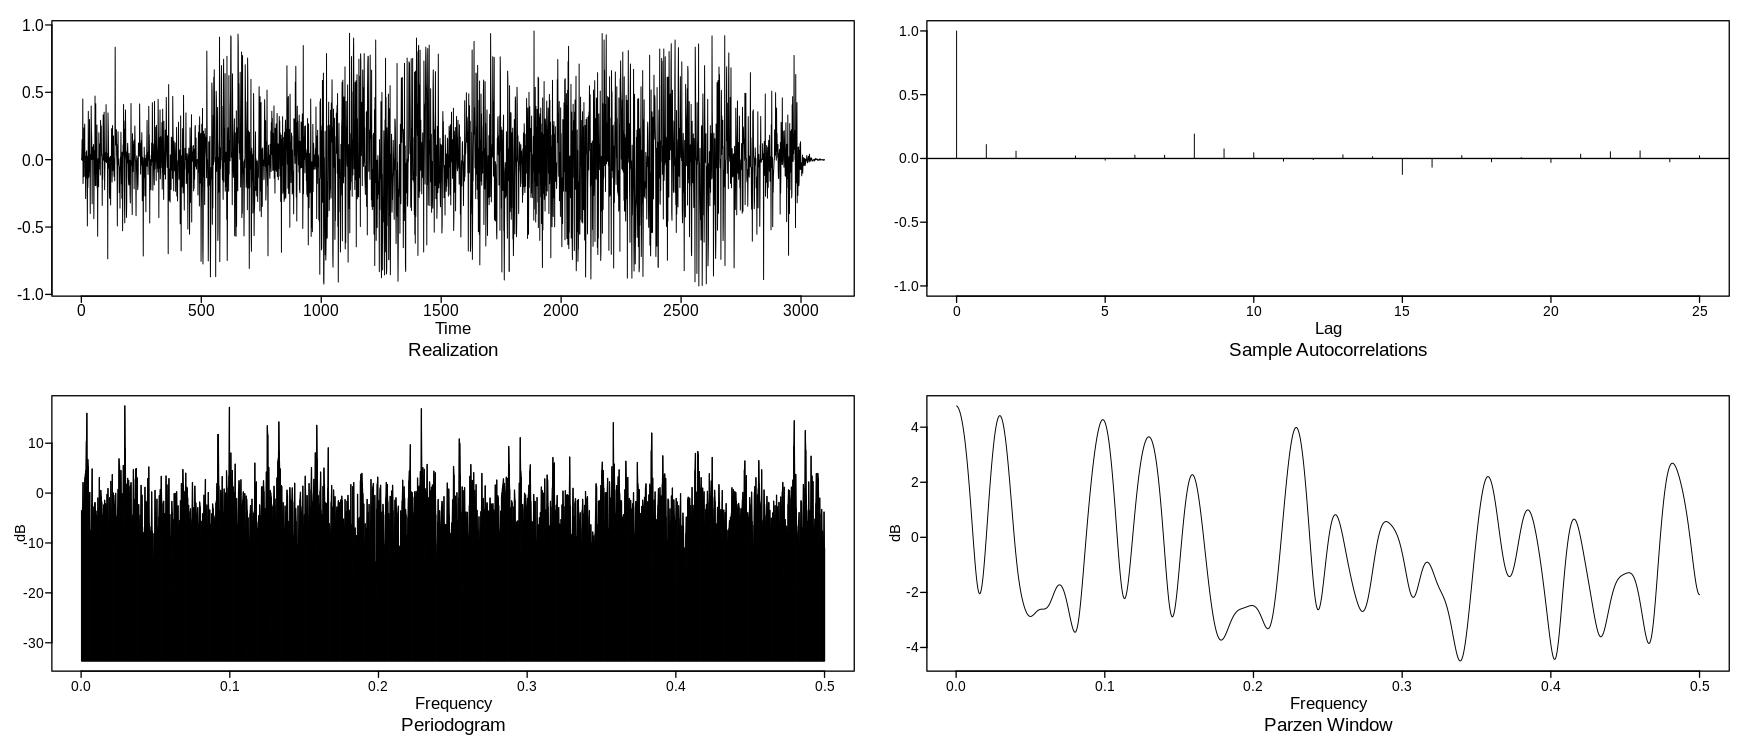

In [ ]:
m1_plots <- plotts.sample.wge(m1[my.indx])

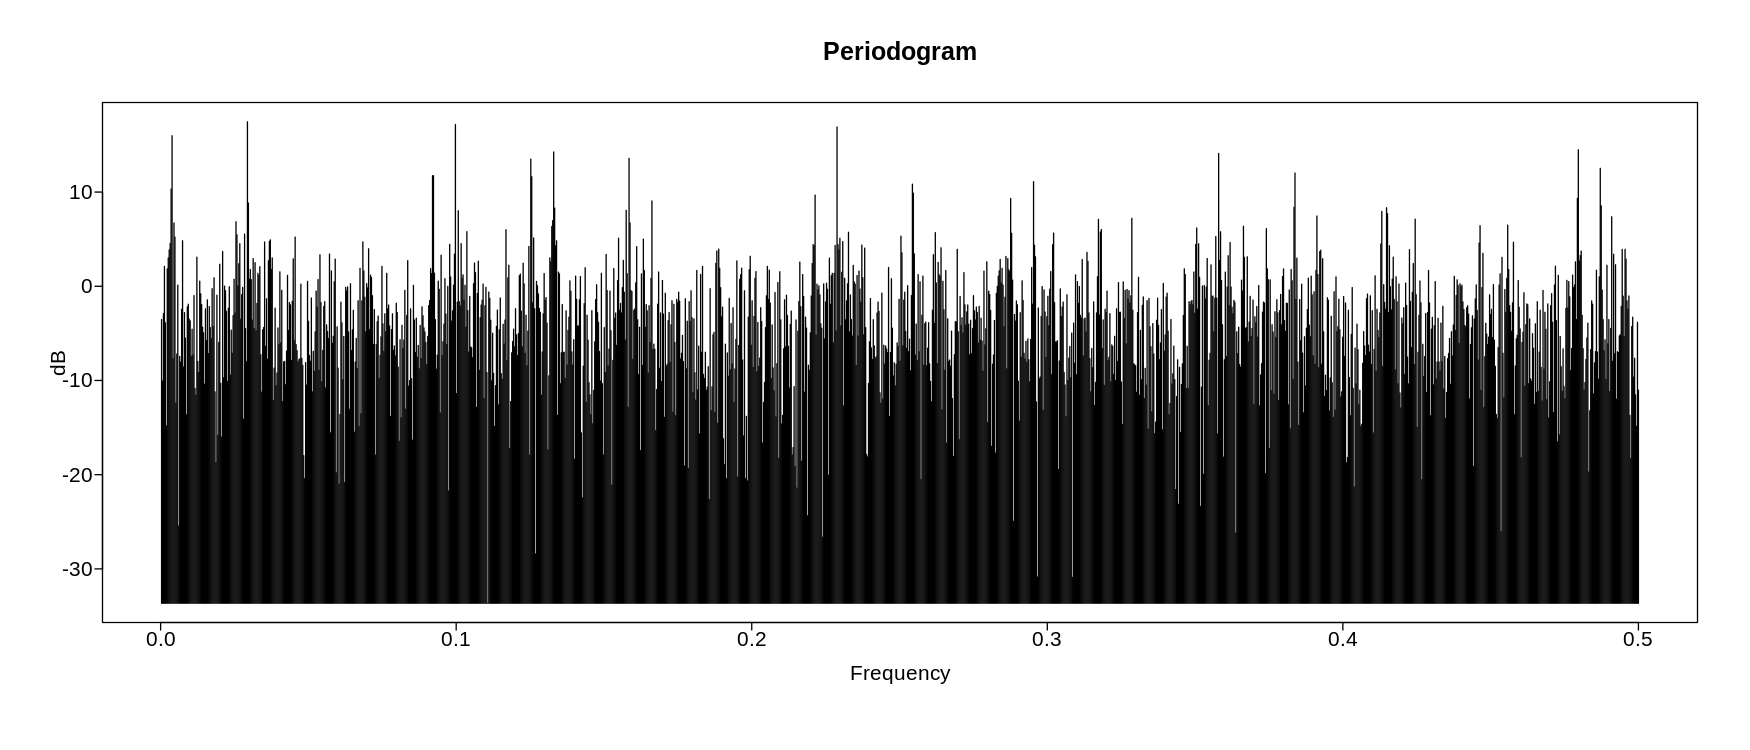

In [ ]:
m1_period <- period.wge(m1[my.indx])


In [ ]:
#Calculate the dominant frequencies first song
max_1 <- which.max(m1_period$pgram)
frequency_1 <- m1_period$freq[max_1]

max_2 <- which.max(m1_period$pgram[0:(max_1-1)])
frequency_2 <- m1_period$freq[max_2]

max_3 <- which.max(m1_period$pgram[0:(max_2-1)])
frequency_3 <- m1_period$freq[max_3]

cat("Period of m1: ", 1/frequency_1, '\n')
cat("Second period of m1: ", 1/frequency_2, '\n')
cat("Third period of m1: ", 1/frequency_3, '\n')


cat("Dominant Frequency of m1: ", frequency_1, '\n')
cat("Second dominant Frequency of m1: ", frequency_2, '\n')
cat("Third dominant Frequency of m1: ", frequency_3)

Period of m1:  34.04396 
Second period of m1:  258.1667 
Third period of m1:  281.6364 
Dominant Frequency of m1:  0.02937379 
Second dominant Frequency of m1:  0.003873467 
Third dominant Frequency of m1:  0.003550678

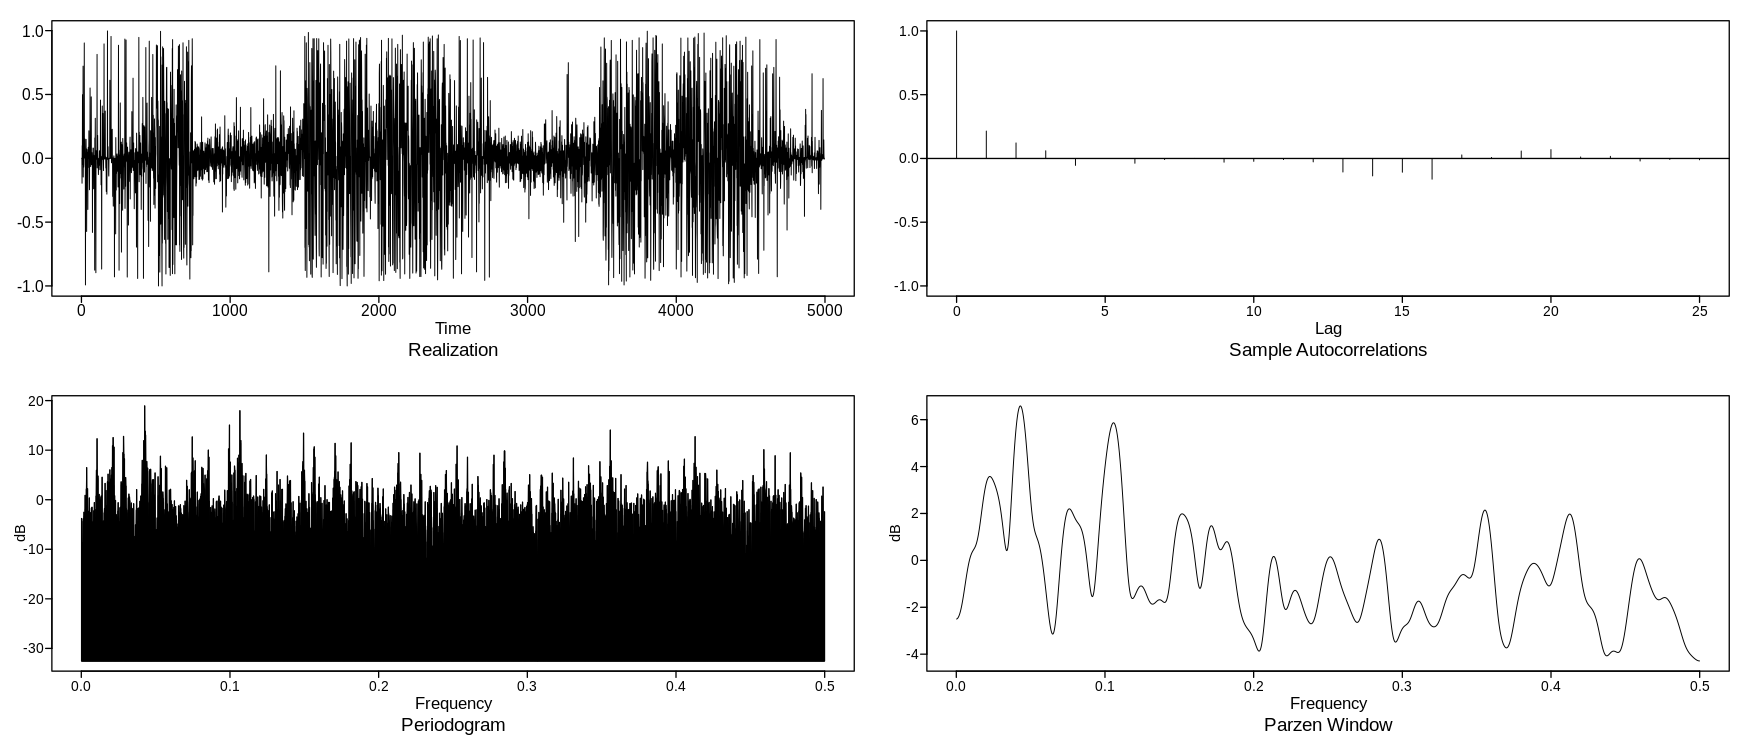

In [ ]:
m2_plots <- plotts.sample.wge(m2[my.indx2])

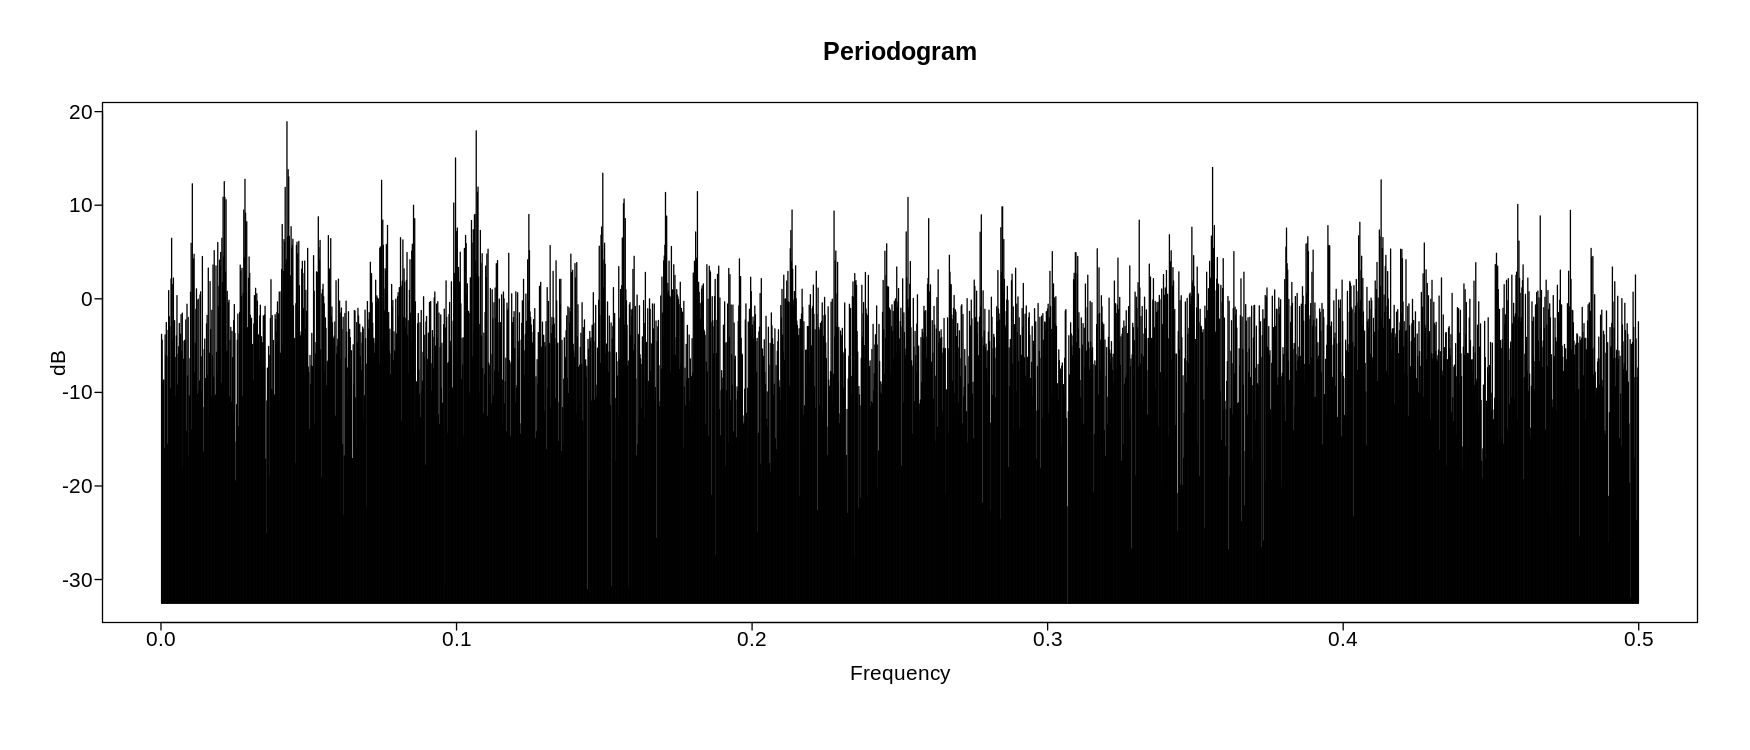

In [ ]:
m2_period <- period.wge(m2[my.indx2])

In [ ]:
#Calculate the dominant frequencies first song
max_1 <- which.max(m2_period$pgram)
frequency_1 <- m2_period$freq[max_1]

max_2 <- which.max(m2_period$pgram[0:(max_1-1)])
frequency_2 <- m1_period$freq[max_2]

max_3 <- which.max(m2_period$pgram[0:(max_2-1)])
frequency_3 <- m2_period$freq[max_3]

cat("Period of m2: ", 1/frequency_1, '\n')
cat("Second period of m2: ", 1/frequency_2, '\n')
cat("Third period of m2: ", 1/frequency_3, '\n')


cat("Dominant Frequency of m2: ", frequency_1, '\n')
cat("Second dominant Frequency of m2: ", frequency_2, '\n')
cat("Third dominant Frequency of m2: ", frequency_3, '\n')

Period of m2:  23.46009 
Second period of m2:  21.8169 
Third period of m2:  46.70093 
Dominant Frequency of m2:  0.04262558 
Second dominant Frequency of m2:  0.04583602 
Third dominant Frequency of m2:  0.02141285 


## __Discussion__


### __Tone Analysis__

We began our analysis by plotting the tone of the songs. Since "Where Did You Go" had over 8 million samples and "On My Mind" had over 13 million samples, we decided to plot only the first 40,000 for each. While this only accounted for about 1 second of audio, this was enough to give us a quick idea of what the general tones were like. Both of the songs had amplitudes ranging from -1 to 1. The most significant difference seemed to be that the waves lingered for longer and with a larger amplitude range in "Where Did You Go" compared to "On My Mind." "On My Mind" had a much tighter amplitude that decreased quickly in short periods.

### __Downsampled Analysis__


After some initial tone analysis, we decided to downsample our songs by 1/16th of the sampling rate. This allowed us to easily plot the songs in their entirety, which showed us how different the structure of the songs are. 

"Where Did You Go" shows no drastic, clear-cut change in the amplitude distribution. The amplitude seems to fluctuate throughout the song, even around the vocals and drops. Generally, the introduction and the outro seem to have tighter ranges, but other than that, nothing sticks out.

On the other hand, "On My Mind" has clear sections in the middle where the amplitude range drops substantially. Throughout the introduction, the amplitude ranges from -1 to 1. Around the 50 second mark is when the introduction ends and vocals start to come in, causing the range to tighten. Around the 90-100 second mark is the drop, which is when the amplitude range goes back up to -1 to 1. Around the 175 second mark, the amplitude drops again, which is reflected in the song as a secondary build-up point; at the end of this build-up, there is a second drop (around the 220-second mark) which point the amplitude goes back up. Lastly, the outro gradually brings the amplitude range down.

We even layered the two plots to show the differences, with blue being "On My Mind" and red being "Where Did You Go." The differences between the two song's lengths and amplitude ranges are both visible, which helped us visually compare them.

### __Time Series Sample Plots__ 


As we discussed in the project proposal, we wanted to compare the two house songs to distinguish potential properties that made "On My Mind" stand out as the product of an established music label. While the two songs are not the same length, we were still able to explore the commonalities and differences based on the two-time series sample plots we generated above. The realizations told us that the frequencies over time consistently oscillated for the original song. Comparatively, the music label had two dominant breaks around the timestamps of 800-1200 and 2800-3200. This is a crucial difference since the appropriate breaks in between the aggressive beats may effectively prevent the hearing palsy of an audience. This could be a key factor to a piece of successful house music.  

One similarity between the two realizations is that the frequency behavior for intro and outro was visible. The beginning and the end of the two songs had fewer activities, which matches the intro and outro that the artists created. Both songs shared an identical behavior for autocorrelations and periodograms. From the parzen window, we can see the music label song seemed to have a more sophisticated cycle compared to the original song. 

Last but not least, we wanted to examine another critical feature - the dominant frequencies between the two songs. The dominant frequencies suggested a more intense beat for the song. Based on the periods of the three dominant frequencies, we can see that the original song seemed to emphasize both the beginning and the end of the song. Meanwhile, the music label focused on the early stage of the song, which rapidly builds up the momentum after the intro.  

## __Challenges__


Initially, we wanted to compare different sub-genres of house music (i.e. tech house vs tropical house vs deep house). However, since we didn't have enough time to do that, we ended up comparing an established house music label to an experienced (but not professional) DJ's work. Since the audio quality might have differed due to different production styles, the analysis might have been affected.

An additional challenge we encountered was how to calculate the Hertz range of our songs. After a decent amount of research, we discovered how to tell what the Hertz range was and included that in our summary statistics table. Even after some debate, we were unsure of how to estimate the hertz range. We settled on the estimate that the range is between the limits of human hearing (20 Hz to 20 kHz) (Purves, 2001).

## __Conclusion__

Overall, the prose of the project was achieved. We established that there is a disparity between the two songs. Using a combination of visual and code analysis, we were able to verify the differences. We discovered that the professionally produced song "On My Mind" had very definite tones within the intro/outro and body of the song, whereas "Where Did You Go" exhibited some of this behavior but overall was not distinguishable. We encountered a few minor problems; however, we were able to find a compromise. In totality, we discovered that there is a distinguishable difference between amateur and professionally produced music. This is not to say the quality is compromised, and the difference can be attributed to different methods of production—not necessarily quality. Nothing is indicating another genre, only production type.


## __References__

1. Davis, T. (2021). Applied Time Series Analysis: Course Notebook - Student Copy Lesson 3 [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1qIdpd_8WFct9zBZ5uwO_Bcg-F3svu0KJ?usp=sharing.

2. Davis, T. (2021). Applied Time Series Analysis: Code Snippets - Analyzing Audio Files [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1IuULZkusjNlO-LMrPhNfiq3UGKWauDCi?usp=sharing.
3. Diplo, & SIDEPIECE. (2019, December 12). Diplo & SIDEPIECE - On My Mind (Official Audio). YouTube. https://www.youtube.com/watch?v=TAKR_6vNJR8.

4. Kaos, DJ. (2021). Where did you go? [mp3]. Retrieved from https://github.com/msmccormack/DATA330/blob/main/Where_did_you_go.mp3?raw=true

5. Purves, D. (2001). The Audible Spectrum. Neuroscience. 2nd edition. https://www.ncbi.nlm.nih.gov/books/NBK10924/#:~:text=Humans%20can%20detect%20sounds%20in,to%2015%E2%80%9317%20kHz.).

6. Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html

7. Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge

8. YT1s.com. Youtube To Mp3 Converter. Youtube To Mp3 Converter . https://yt1s.com/youtube-to-mp3/en2.

